In [215]:
import numpy as np
import pandas as pd

In [216]:
df = pd.read_csv("data/athlete_events.csv")
region_df  = pd.read_csv("data/noc_regions.csv")

In [217]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [218]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [219]:
df = df.merge(region_df, on='NOC', how='left')
df = df[df['Season'] == 'Summer']

df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [220]:
df['region'].unique().shape

(206,)

In [221]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [222]:
df.duplicated().sum()

np.int64(1385)

In [223]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

In [224]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [225]:
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
26,False,False,False
...,...,...,...
271106,False,False,False
271107,False,False,False
271108,False,False,False
271109,False,False,False


In [226]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [227]:
df.groupby(['NOC', 'region']).sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,region,Gold,Silver,Bronze
0,USA,USA,2472,1333,1197
1,URS,Russia,832,635,596
2,GBR,UK,635,729,620
3,GER,Germany,592,538,649
4,ITA,Italy,518,474,454
...,...,...,...,...,...
221,WIF,Trinidad,0,0,5
222,YEM,Yemen,0,0,0
223,YAR,Yemen,0,0,0
224,YMD,Yemen,0,0,0


In [228]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233749,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
236445,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
236446,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
250689,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


In [229]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Medal', 'Event'])

In [230]:
medal_tally = medal_tally.groupby(['NOC', 'region']).sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

medal_tally

,NOC,region,Gold,Silver,Bronze
0,USA,USA,1035,802,708
1,URS,Russia,394,317,294
2,GBR,UK,278,317,300
3,GER,Germany,235,261,283
4,FRA,France,234,256,287
...,...,...,...,...,...
221,WIF,Trinidad,0,0,2
222,YEM,Yemen,0,0,0
223,YAR,Yemen,0,0,0
224,YMD,Yemen,0,0,0


In [231]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,region,Gold,Silver,Bronze
51,IND,India,9,7,12


In [232]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,NOC,region,Gold,Silver,Bronze,Total
0,USA,USA,1035,802,708,2545
1,URS,Russia,394,317,294,1005
2,GBR,UK,278,317,300,895
3,GER,Germany,235,261,283,779
4,FRA,France,234,256,287,777
...,...,...,...,...,...,...
221,WIF,Trinidad,0,0,2,2
222,YEM,Yemen,0,0,0,0
223,YAR,Yemen,0,0,0,0
224,YMD,Yemen,0,0,0,0


In [233]:
country = np.unique(df['region'].dropna().values).tolist()
country.insert(0, 'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [234]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Medal', 'Event'])

In [235]:
def fetch_medal_tally(df, year, country):
    medal_df = df
    flag = 0
    if year == 'overall' and country == 'overall':
        temp_df = medal_df
    elif year == 'overall' and country != 'overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    elif year != 'overall' and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    else:
        temp_df = medal_df[(medal_df['region'] == country) & (medal_df['Year'] == int(year))]

    if flag == 1:
        x = temp_df.groupby(['Year']).sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=True).reset_index()
    else:
        x = temp_df.groupby(['region']).sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    return x


In [236]:
fetch_medal_tally(df=medal_df, year='overall', country='USA')

,Year,Gold,Silver,Bronze,total
0,1896,11,6,2,19
1,1900,21,16,17,54
2,1904,76,79,76,231
3,1906,12,5,6,23
4,1908,22,12,12,46
5,1912,26,18,19,63
6,1920,41,27,27,95
7,1924,45,27,27,99
8,1928,22,18,16,56
9,1932,44,36,30,110


In [237]:
df['Year'].unique().shape[0] - 1

# Note:
# Although the modern Olympics began in 1896 and are held every 4 years,
# only 29 Summer Olympic Games were conducted between 1896 and 2016 (a 120-year span).
#
# Here's why:
# - The 1906 Intercalated Games (held in Athens) were once considered official but are now excluded by the IOC.
# - The 1916 Olympics were canceled due to World War I.
# - The 1940 and 1944 Olympics were canceled due to World War II.
#
# So, despite the 4-year cycle, historical disruptions caused only 29 official Summer Olympic events during that period.

28

In [238]:
df['City'].unique().shape[0]

23

In [239]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [240]:
df['Sport'].unique().shape[0]

52

In [241]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [242]:
df['Name'].unique().shape[0]

116122

In [243]:
df['region'].unique().shape[0]

# Note: The dataset contains 206 unique "regions", which may seem confusing at first since there aren't 206 countries.
# This is because "region" refers to National Olympic Committees (NOCs), not strictly sovereign nations.
# Many regions like Hong Kong, Puerto Rico, and Chinese Taipei compete independently.
# Historical entities (e.g., USSR, Yugoslavia, East Germany) are also included for accuracy.
# Thus, the 206 regions reflect all recognized Olympic participants, past and present — not just modern countries.

206

In [244]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

nations_over_time.rename(columns={'Year':'Edition', 'count':'No. of Countries'}, inplace=True)
nations_over_time

,Edition,No. of Countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


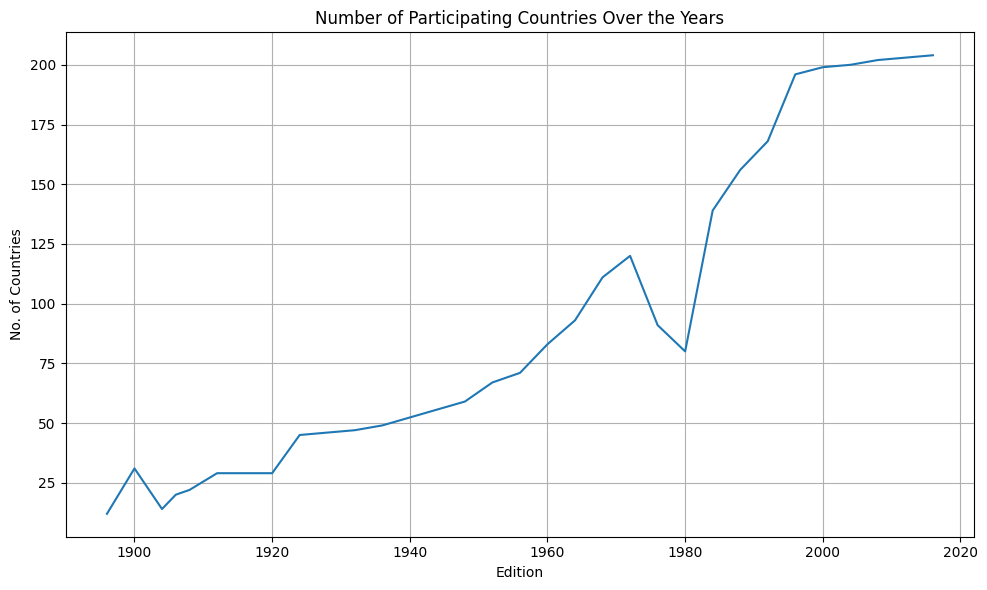

In [245]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(nations_over_time['Edition'], nations_over_time['No. of Countries'], marker='', linestyle='-')
plt.title('Number of Participating Countries Over the Years')
plt.xlabel('Edition')
plt.ylabel('No. of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ⚠️ Noticeable Drop in 1980 Participation:
# The sharp decline in the number of athletes and participating nations during the 1980 Moscow Olympics
# was due to a widespread boycott led by the United States, in response to the Soviet invasion of Afghanistan.
# Over 60 countries chose not to participate, leading to one of the lowest turnouts in Olympic history.

In [ ]:
# 📉 Flattening of the Growth Curve Post-2000:
# After the 2000 Sydney Olympics, the number of participating athletes began to grow at a slower rate.
# This is attributed to the IOC's efforts to cap athlete numbers, stricter qualification rules,
# and logistical limits faced by host cities. The Olympic Games reached near-saturation in terms of global participation.